In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('data.csv')
df.head()

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No


In [14]:
df['cgpa']=df['cgpa'].str.replace(',','.').astype(float)

In [15]:
df

,cgpa,iq,placement
0,6.8,123.0,Yes
1,5.9,106.0,No
2,5.3,121.0,No
3,7.4,132.0,Yes
4,5.8,142.0,No
...,...,...,...
95,4.3,200.0,No
96,4.4,42.0,No
97,6.7,182.0,Yes
98,6.3,103.0,Yes


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    object 
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [17]:
df.isnull().sum()

cgpa         5
iq           0
placement    0
dtype: int64

In [25]:
df['cgpa']=df['cgpa'].fillna(df['cgpa'].mean())

In [26]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [28]:
#  encoding placement into 1 or 0
df['placement'] = np.where(df['placement'] == 'Yes', 1, 0)

In [29]:
X=df.iloc[: ,0:2]
Y=df.iloc[ : , -1]

In [30]:
X ,Y

(    cgpa     iq
 0    6.8  123.0
 1    5.9  106.0
 2    5.3  121.0
 3    7.4  132.0
 4    5.8  142.0
 ..   ...    ...
 95   4.3  200.0
 96   4.4   42.0
 97   6.7  182.0
 98   6.3  103.0
 99   6.2  113.0
 
 [100 rows x 2 columns],
 0     1
 1     0
 2     0
 3     1
 4     0
      ..
 95    0
 96    0
 97    1
 98    1
 99    1
 Name: placement, Length: 100, dtype: int64)

In [31]:
import matplotlib.pyplot as plt

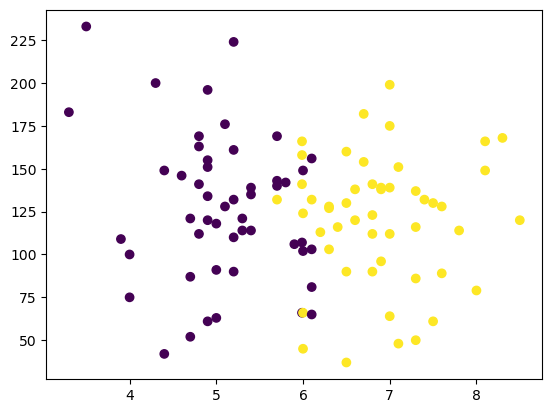

In [37]:
plt.scatter(df['cgpa'] ,df['iq'],c=df['placement'])
#  found that the data is linear type

In [38]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [46]:
# scale data 

from sklearn.preprocessing import StandardScaler


In [47]:
scaler=StandardScaler()

In [50]:
scaler.fit_transform(X)

array([[ 0.72342187, -0.01459341],
       [-0.07881639, -0.44233119],
       [-0.61364189, -0.0649155 ],
       [ 1.25824737,  0.21185601],
       [-0.16795397,  0.46346647],
       [ 0.99083462, -1.90167186],
       [-0.25709156,  0.48862751],
       [-0.88105465, -1.52425617],
       [ 0.09945878,  0.81572111],
       [ 0.        , -1.44877303],
       [ 0.01032119, -1.977155  ],
       [ 0.81255945,  0.36282228],
       [-0.52450431,  0.38798333],
       [ 0.36687153, -0.19072073],
       [ 0.09945878, -0.51781433],
       [-0.79191706,  1.31894203],
       [-0.70277948,  2.52667224],
       [-2.39639357,  1.49506935],
       [-1.77243048, -0.59329747],
       [-0.70277948,  0.21185601],
       [ 0.5451467 , -0.09007654],
       [ 0.99083462,  0.68991588],
       [-0.97019223, -0.09007654],
       [-1.1484674 , -0.92039106],
       [-1.1484674 , -0.0649155 ],
       [-0.88105465, -0.81974688],
       [ 0.90169703,  1.89764609],
       [ 0.01032119,  0.01056764],
       [-0.70277948,

In [51]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.1)

In [53]:
# model train
from sklearn.linear_model import LogisticRegression

In [54]:
model= LogisticRegression()

In [58]:
model.fit(X_train,y_train)

LogisticRegression()

In [62]:
predict= model.predict(X_test)

In [61]:
# accuracy calculate
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

1.0

In [65]:
from mlxtend.plotting import plot_decision_regions

In [64]:
pip install  mlxtend

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.4 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

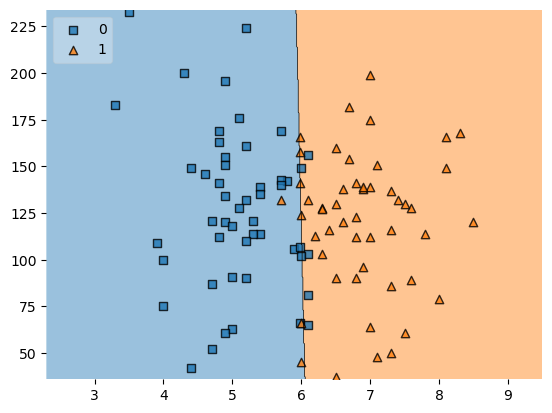

In [68]:
plot_decision_regions(X.values, Y.values, clf=model, legend=2)